**Deep learning fundamentals**

> Understand difference between classical ML algorithms and deep neural networks

> Understand the components/layers of Artificial Neural Networks





Deep Learning belongs to the field of statistical machine learning that gives computers the ability to learn representations from data. A model is a mathematical representation that a computer uses to understand the world.


Deep learning is an ML technique that seeks to model the way the human brain works mathematically hence why DL models are called Artificial Neural Networks (ANNs).

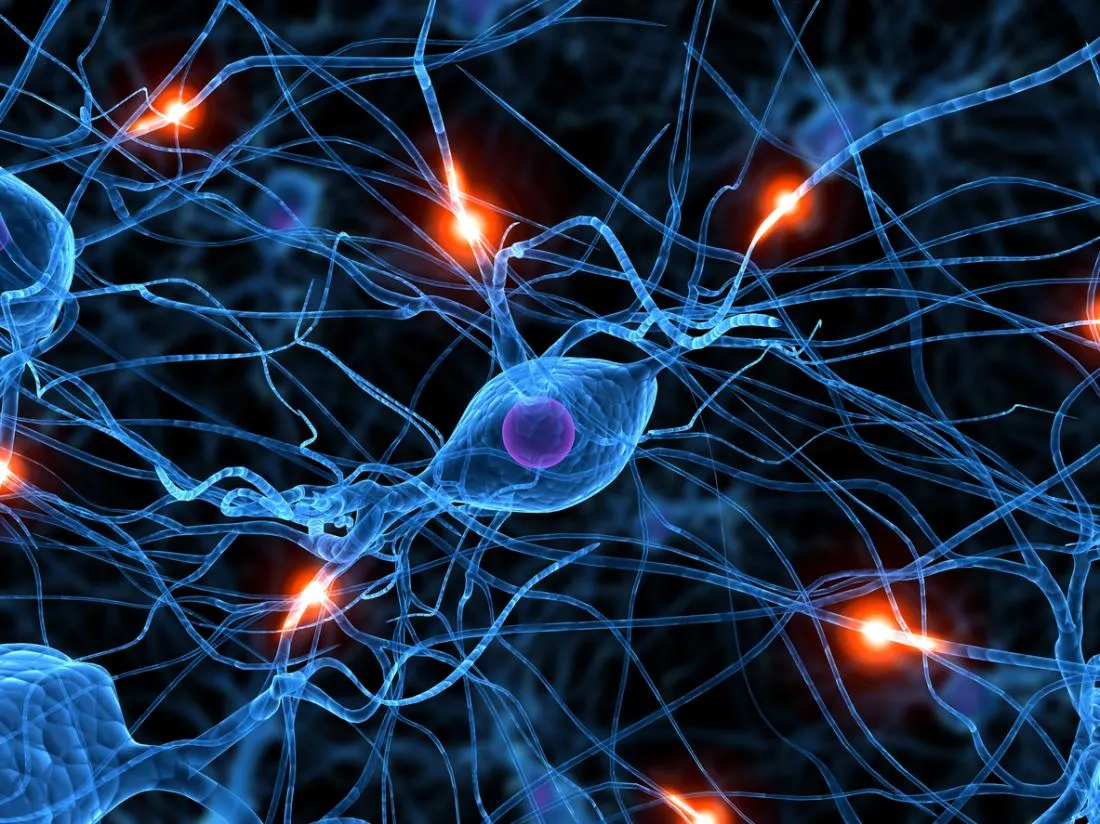

ANNs are thus mathematical models that attempt to learn representations from data by mapping relationships the same way the human nueral system is understood to function.

As the human brain consists of neurons which transmit and process information received from our senses, a DL model is also made up of neurons arranged in layers (The number of Layers describe the depth of the model) so as to learn the internal mappings in a data even though the data is unstructured and high volume.

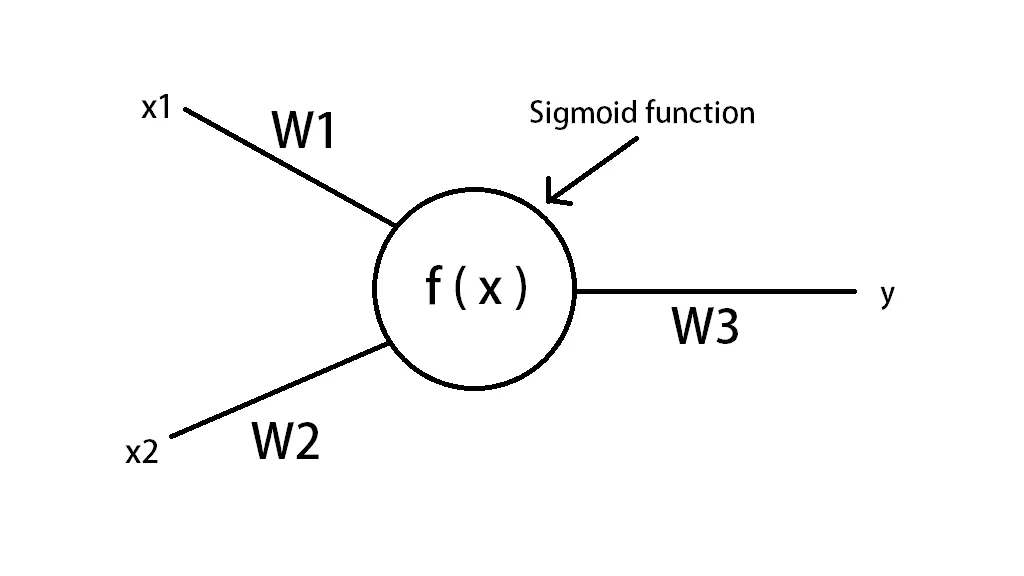

An Artificial Neuron itself is a mathematical function. In biology, a neuron receives signals from other neurons, processes them, and decides whether to “fire” or not.

In an artificial neural network, a neuron does something very similar — it takes inputs, processes them mathematically, and produces an output.

How does an Artificial Neuron work?

Imagine we have a neuron with inputs X1, X2

Each input has a weight (a learnable parameter):

Thus the model finds the weighted sum of the inputs

Z = X1W1 + X2W2 + B

The weight (W) — determines how important each input is.

The bias (B) — shifts the output up or down.

This step is a linear combination.


If a network were combining only linear com-
ponents, it would itself be a linear operator,
so it is essential to have non-linear operations for the model to be able to learn complex representations and mappings.

These are implemented in particular with activation functions, which are layers that transform
each component of the input tensor individually
through a mapping, resulting in a tensor of the
same shape.

The neuron then applies an activation function f to this weighted sum:

Y = f(Z)

Common activation functions:

Sigmoid: squashes values between 0 and 1.

ReLU (Rectified Linear Unit): outputs 0 if input is negative, else outputs the input itself.

Tanh: outputs values between -1 and 1.

In [1]:
import numpy as np

X1 = 3
X2 = 1
W1 = 0.5
W2 = 0.6
B = 3

def sigmoid_activation(z):
  return 1 / (1 + np.exp(-z))

def neuron(inputs, weights, bias, activation):
    z = sum(w * x for w, x in zip(weights, inputs)) + bias
    return activation(z)

Y = neuron([X1, X2], [W1, W2], B, sigmoid_activation) #neuron output
print(Y)

0.9939401985084158


A neural network stacks many neurons into layers:

Input layer → takes raw data (e.g., pixels of an image).

Hidden layers → learn intermediate patterns (e.g., edges, shapes).

Output layer → produces the prediction (e.g., “cat” or “dog”).

Each neuron transforms its inputs as we have seen.

Stacking these transformations layer after layer creates a composite function that maps inputs to outputs.

The network starts with random weights & biases, and training adjusts them so that this big function matches your data.

**What happens during training?**

You feed input data through the network.

Each neuron applies it transformation based on weighted sum and activation function, then passes output to the next layer.

The network produces a prediction.

The prediction is compared to the true answer (label).

And a predetermined loss function measures “how wrong” the prediction is.

This is the forward pass or forward propagation.

The loss function is the compass of the entire training process.

It quantifies error: How far is the network's prediction from the correct answer?

It guides learning: Backpropagation uses the loss to compute gradients.

No loss function = No direction to update weights.

Examples of loss functions:

Regression tasks → Mean Squared Error (MSE):

𝐿 = 1/𝑛 ∑(Ytrue − Ypred) ^ 2

Classification tasks → Cross-Entropy Loss:

𝐿 = - ∑ Ytrue log(Ypred)

Using calculus (chain rule), we calculate how much each weight & bias contributed to the error.

This gives us gradients — direction & strength of adjustment needed.

We update each weight and bias slightly in the direction that reduces the loss:

W = W - 𝜂∂𝐿/∂W

η = learning rate (small number that controls step size)

∂𝐿/∂W = gradient of the loss with respect to the weight

This process is called gradient descent.


The network starts random (essentially guessing).

With every training example:

Predictions are made → loss computed → weights nudged slightly to be less wrong.

After thousands/millions of these updates, the network’s weights encode patterns in the data — edges → shapes → objects, or word relationships → sentence meaning.

Over time, the composite function built by all layers transforms raw input into accurate predictions.

In [ ]:
# ----- Helper functions -----
def sigmoid_derivative(x):
    # derivative assumes x is already sigmoid(x)
    return x * (1 - x)

# ---- Data ----
X = np.array([0.5, 0.1])   # Single input sample
y_true = 1                 # Expected output

# ---- Initialize weights & biases ----
np.random.seed(0)
W1 = [np.random.randn(2) for _ in range(2)]   # 2 neurons in hidden layer
b1 = [0.0, 0.0]

W2 = np.random.randn(2)     # 1 neuron output layer (2 inputs -> 1 output)
b2 = 0.0

# ---- Forward Pass ----
# Hidden layer
h1 = neuron(X, W1[0], b1[0], sigmoid_activation)
h2 = neuron(X, W1[1], b1[1], sigmoid_activation)
hidden_outputs = np.array([h1, h2])

# Output layer
y_pred = neuron(hidden_outputs, W2, b2, sigmoid_activation)

print("Forward pass prediction:", y_pred)

# ---- Compute Loss (Mean Squared Error) ----
loss = (y_true - y_pred) ** 2
print("Loss:", loss)

# ---- Backward Pass ----
lr = 0.1  # learning rate

# Gradient wrt prediction
dL_dy = -2 * (y_true - y_pred)

# --- Output neuron ---
dy_dz2 = sigmoid_derivative(y_pred)
dL_dz2 = dL_dy * dy_dz2

# Gradients for output weights & bias
dL_dW2 = dL_dz2 * hidden_outputs
dL_db2 = dL_dz2

# --- Hidden neurons ---
dL_dh = dL_dz2 * W2               # gradient of loss wrt hidden outputs
dh_dz1 = sigmoid_derivative(hidden_outputs)

# Gradients for hidden weights & biases
dL_dz1 = dL_dh * dh_dz1

dL_dW1 = [dL_dz1[i] * X for i in range(2)]
dL_db1 = dL_dz1

# ---- Update Weights ----
# Output layer
W2 -= lr * dL_dW2
b2 -= lr * dL_db2

# Hidden layer
for i in range(2):
    W1[i] -= lr * dL_dW1[i]
    b1[i] -= lr * dL_db1[i]

print("\nUpdated W1:", W1)
print("Updated W2:", W2)
print("Updated biases:", b1, b2)

Forward pass prediction: 0.6637933037305938
Loss: 0.11303494261638879

Updated W1: [array([1.76690501, 0.40072774]), array([0.97711964, 2.24056953])]
Updated W2: [ 1.87829442 -0.96720613]
Updated biases: [np.float64(0.005705322859228527), np.float64(-0.0032366897642837145)] 0.01500636759926616


**Convolutional Neural Networks (CNNs)**

> What are CNNs?

Convolutional Neural Networks (CNNs) are a specialized type of artificial neural network (ANN) primarily designed to process grid-like data, such as images (2D grids of pixels) or time series (1D grids of signals) and are tailored for spatial feature extraction and hierarchical pattern recognition.

> Understand the Architecture of a CNN

The CNN as we have said is a specialized type of ANN engineered for spatial feature extraction, so it is made up of different layers as we know ANNs are but with the structural purpose of hierarchical pattern recognition. Let's consider the various layers in a simple CNN:



1. The Input Layer

Takes in the raw image data.

If your image is black and white (grayscale), it's just a grid of numbers.

For example, a 4×4 image might look like:

[[1, 2, 1, 0],
 [0, 1, 0, 2],
 [2, 1, 2, 1],
 [1, 0, 1, 0]]

Each number represents the brightness of a pixel (0 = dark, 2 = bright, etc.)

2. Convolutional Layer

Detects simple patterns (like edges or corners) in small parts of the image using something called a filter or kernel.

Imagine you’re reading a newspaper with a magnifying glass that only shows 2×2 letters at a time. You slide it over the page and analyze what's under it. That’s what a filter does - it scans small areas and looks for specific patterns.

The filter is a small grid of numbers (e.g., 2×2), and it slides over the image.

At each position, it multiplies the values it sees and adds them up.

This gives us a feature map, that is, a new image showing where the pattern was found.

Why is the convolution layer necessary?

To help the model recognize basic features like edges, lines, or color transitions, the building blocks of shapes.

In [ ]:
def convolve(image, kernel):
    kernel_size = len(kernel)
    result = []
    for i in range(len(image) - kernel_size + 1):
        row = []
        for j in range(len(image[0]) - kernel_size + 1):
            patch = [image[i+x][j+y] * kernel[x][y] for x in range(kernel_size) for y in range(kernel_size)]
            row.append(sum(patch))
        result.append(row)
    return result

# Example
image = [
    [1, 2, 1, 0],
    [0, 1, 0, 2],
    [2, 1, 2, 1],
    [1, 0, 1, 0]
]

kernel = [
    [1, 0],
    [0, -1]
]


conv_output = convolve(image, kernel)
print(conv_output)

[[0, 2, -1], [-1, -1, -1], [2, 0, 2]]


3. Activation Layer (ReLU is the most used)

Makes the feature map more useful by removing negative values.

Think of this like a filter that only keeps positive emotions in a conversation. Anything negative? Just ignore it!

If a number is negative, we set it to 0.

If it's positive, we keep it.

This helps the model focus on activated features (patterns that matched something).

In [ ]:
def relu(feature_map):
    return [[max(0, val) for val in row] for row in feature_map]

relu_output = relu(conv_output)
print(relu_output)

[[0, 2, 0], [0, 0, 0], [2, 0, 2]]


4. Pooling Layer (Max Pooling)

Shrinks the image while keeping the most important parts.

Think of pooling as summarizing. You don’t need every detail to understand a photo — just the important highlights.

We take little patches (e.g., 2×2) and pick the largest number from each. This is called Max Pooling.

This keeps the strong signals and removes noise.

It also makes the next layers faster and easier to train.

So Pooling Reduces size, speeds things up, and helps the network focus on what matters.

In [ ]:
def max_pool(feature_map, size=2):
    pooled = []
    for i in range(0, len(feature_map), size):
        row = []
        for j in range(0, len(feature_map[0]), size):
            window = [feature_map[i+x][j+y] for x in range(size) for y in range(size)
                      if i + x < len(feature_map) and j + y < len(feature_map[0])]
            row.append(max(window))
        pooled.append(row)
    return pooled

pooled_output = max_pool(relu_output)
print(pooled_output)

[[2, 0], [2, 2]]


5. Flatten Layer

Converts the 2D image data into a 1D list of numbers.

Imagine flattening a page of text into a single long line to read into a program — no rows, just a single row of text.

This step is needed because the next layer (Fully Connected) expects a simple list of numbers.

For example, a 2x2 grid becomes [5, 0, 3, 2] to prepare the data for decision-making in the next layer.

In [ ]:
def flatten(feature_map):
    return [val for row in feature_map for val in row]

flattened = flatten(pooled_output)
print(flattened)

[2, 0, 2, 2]


6. Fully Connected Layer (also called Dense Layer)

This is the decision-maker that looks at the features extracted from the previous layers.

It has weights that tell it how important each feature is.

Combines everything to output predictions (e.g., "70% cat, 30% dog").

Imagine a teacher looking at clues from an assignment (edges, whiskers, ears) and making a final decision: “This is probably a cat.”

This is where the network learns to classify or predict based on features.

In [ ]:
def dense_layer(inputs, weights, biases):
    outputs = []
    for w, b in zip(weights, biases):
        output = sum(i * j for i, j in zip(inputs, w)) + b
        outputs.append(output)
    return outputs

# Dummy weights and biases for 2 output classes
weights = [
    [0.2] * len(flattened),  # Weights for class 1
    [-0.3] * len(flattened)  # Weights for class 2
]
biases = [0.1, -0.1]

dense_output = dense_layer(flattened, weights, biases)
print(dense_output)

[1.3000000000000003, -1.9]


7. Output Layer

Gives you the final prediction.

Usually uses Softmax as an activation function, which turns the dense layer output which are logits into probabilities.

Example: [0.8, 0.2] = 80% cat, 20% dog.

In [ ]:
import math

def softmax(x):
    exps = [math.exp(i) for i in x]
    sum_exps = sum(exps)
    return [j / sum_exps for j in exps]

final_output = softmax(dense_output)
print(final_output)

[0.9608342772032357, 0.03916572279676435]


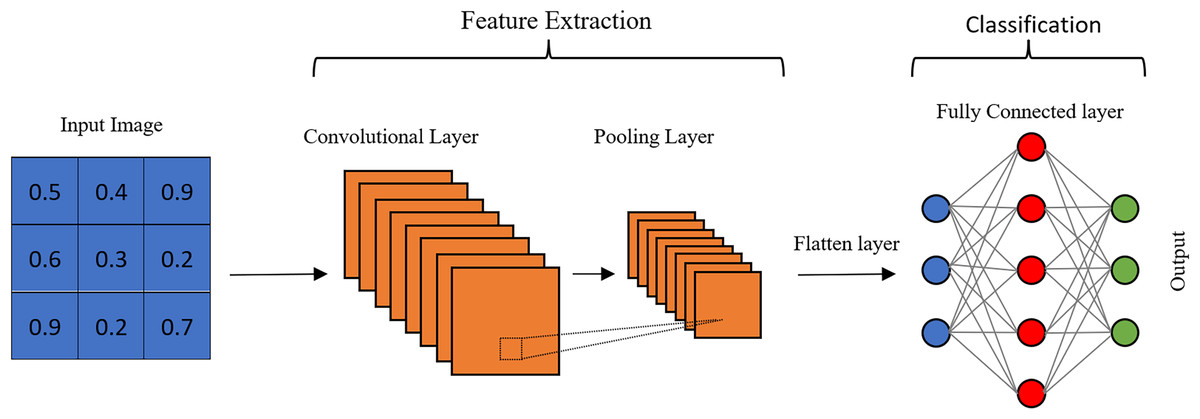

**Popular architectures (LeNet, AlexNet,
VGG, ResNet, MobileNet)**

> Students should research MobileNet on their own and its peculiarity when compared to the aforementioned Architectures

In [ ]:
#redefine neccessary functions for each architecture's components
import numpy as np

def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / np.sum(e_x)

def conv2d(input, kernel):
    # A very naive 2D convolution (no padding, no stride)
    output_shape = (
        input.shape[0] - kernel.shape[0] + 1,
        input.shape[1] - kernel.shape[1] + 1
    )
    output = np.zeros(output_shape)
    for i in range(output.shape[0]):
        for j in range(output.shape[1]):
            output[i, j] = np.sum(input[i:i+kernel.shape[0], j:j+kernel.shape[1]] * kernel)
    return output

def maxpool2d(input, size=2, stride=2):
    out_h = (input.shape[0] - size) // stride + 1
    out_w = (input.shape[1] - size) // stride + 1
    output = np.zeros((out_h, out_w))
    for i in range(out_h):
        for j in range(out_w):
            output[i, j] = np.max(input[i*stride:i*stride+size, j*stride:j*stride+size])
    return output

def flatten(x):
    return x.flatten()

def dense(x, weights, bias):
    return np.dot(weights, x) + bias

**A close look at LeNet**

LeNet-5 is a pioneering CNN architecture introduced by Yann LeCun in 1998 to recognize handwritten digits (like those from the MNIST dataset (0–9 digits)).

It is simple, layered, and perfect for understanding how CNNs process images step-by-step.

In [ ]:
def lenet(input_image):
    # 1. Conv1: 6 filters of 5x5
    x = conv2d(input_image, np.random.rand(5, 5))
    x = relu(x)
    x = maxpool2d(x)

    # 2. Conv2: 16 filters of 5x5
    x = conv2d(x, np.random.rand(5, 5))
    x = relu(x)
    x = maxpool2d(x)

    # 3. Flatten
    x = flatten(x)

    # 4. FC1
    x = relu(dense(x, np.random.rand(120, len(x)), np.zeros(120)))

    # 5. FC2
    x = relu(dense(x, np.random.rand(84, 120), np.zeros(84)))

    # 6. Output layer (10 classes)
    out = softmax(dense(x, np.random.rand(10, 84), np.zeros(10)))
    return out


 **A close look at AlexNet**


AlexNet was introduced in 2012 by Alex Krizhevsky, Ilya Sutskever, and Geoffrey Hinton, and it won the ImageNet competition by a huge margin.

ImageNet is a challenge involving classifying images into 1,000 categories, like cats, dogs, planes, chairs, etc.


*AlexNet is like a much deeper, more powerful version of LeNet, built to handle real-world images with complex textures, colors, and objects. It takes in a big image, uses filters to detect edges and patterns, pools to reduce size, then uses fully connected layers and softmax to decide: “Is this a cat, dog, truck, or banana?”*

In [ ]:
def alexnet(input_image):
    # Conv1
    x = conv2d(input_image, np.random.rand(11, 11))
    x = relu(x)
    x = maxpool2d(x, 3, 2)

    # Conv2
    x = conv2d(x, np.random.rand(5, 5))
    x = relu(x)
    x = maxpool2d(x, 3, 2)

    # Conv3
    x = conv2d(x, np.random.rand(3, 3))
    x = relu(x)

    # Conv4
    x = conv2d(x, np.random.rand(3, 3))
    x = relu(x)

    # Conv5
    x = conv2d(x, np.random.rand(3, 3))
    x = relu(x)
    x = maxpool2d(x, 3, 2)

    # Flatten
    x = flatten(x)

    # FC1
    x = relu(dense(x, np.random.rand(4096, len(x)), np.zeros(4096)))

    # FC2
    x = relu(dense(x, np.random.rand(4096, 4096), np.zeros(4096)))

    # Output
    out = softmax(dense(x, np.random.rand(1000, 4096), np.zeros(1000)))
    return out


**A close look at VGG**

VGG (Visual Geometry Group) is a CNN architecture introduced by the University of Oxford's Visual Geometry Group in 2014, primarily in the paper:

"Very Deep Convolutional Networks for Large-Scale Image Recognition"
by Karen Simonyan and Andrew Zisserman

It performed exceptionally well on the ImageNet challenge, showing that going deeper with small filters was very effective.


It popularized the idea that deep networks with uniform 3×3 convolutions can outperform complex architectures.

It uses a stacked, modular design — very clean and easy to understand.

It demonstrated that depth matters — deeper networks learn better features.

*VGG is like the Lego of CNNs: it uses small, identical blocks (3x3 conv + ReLU + pooling) stacked on top of each other to build a deep network that understands images really well. Its strength lies in simplicity, depth, and modularity, and it paved the way for even deeper models like ResNet.*

In [ ]:
def vgg16(input_image):
    # 2x Conv 3x3 + MaxPool
    for _ in range(2):
        x = conv2d(input_image, np.random.rand(3, 3))
        x = relu(x)
    x = maxpool2d(x)

    # 2x Conv 3x3 + MaxPool
    for _ in range(2):
        x = conv2d(x, np.random.rand(3, 3))
        x = relu(x)
    x = maxpool2d(x)

    # 3x Conv 3x3 + MaxPool
    for _ in range(3):
        x = conv2d(x, np.random.rand(3, 3))
        x = relu(x)
    x = maxpool2d(x)

    # 3x Conv 3x3 + MaxPool
    for _ in range(3):
        x = conv2d(x, np.random.rand(3, 3))
        x = relu(x)
    x = maxpool2d(x)

    # 3x Conv 3x3 + MaxPool
    for _ in range(3):
        x = conv2d(x, np.random.rand(3, 3))
        x = relu(x)
    x = maxpool2d(x)

    # Flatten
    x = flatten(x)

    # FC1
    x = relu(dense(x, np.random.rand(4096, len(x)), np.zeros(4096)))

    # FC2
    x = relu(dense(x, np.random.rand(4096, 4096), np.zeros(4096)))

    # Output
    out = softmax(dense(x, np.random.rand(1000, 4096), np.zeros(1000)))
    return out


**A close look at ResNet**

ResNet stands for Residual Network. It was introduced by Kaiming He et al. in 2015 in the paper:

“Deep Residual Learning for Image Recognition”
It won the ImageNet 2015 competition by a wide margin.

Before ResNet, people noticed something strange:

“As we stack more layers in a CNN, performance gets worse!”

This was called the "Degradation Problem" — deeper networks should, in theory, perform better, but they didn’t because:

They became hard to train

Gradients would vanish or explode

Networks got stuck or started overfitting

ResNet introduced a very simple but powerful idea:

Let the layers learn only what they need to change — not the entire transformation.

This is called residual learning.

The input (x) is added back to the output of the layers — this is called a skip connection or shortcut connection.

This forces the network to learn only the "residual" — the difference between input and output, not the full transformation.

There are different versions: ResNet-18, ResNet-34, ResNet-50, ResNet-101, etc. The number refers to the number of layers.

In [ ]:
def residual_block(x):
    identity = x.copy()
    x = relu(conv2d(x, np.random.rand(3, 3)))
    x = conv2d(x, np.random.rand(3, 3))
    x += identity  # Skip connection
    return relu(x)

def resnet(input_image):
    # Initial Conv
    x = conv2d(input_image, np.random.rand(7, 7))
    x = relu(x)
    x = maxpool2d(x)

    # Residual Blocks (just showing 2 stages)
    for _ in range(2):
        x = residual_block(x)

    # Flatten
    x = flatten(x)

    # FC
    x = relu(dense(x, np.random.rand(512, len(x)), np.zeros(512)))

    # Output
    out = softmax(dense(x, np.random.rand(1000, 512), np.zeros(1000)))
    return out

**Transfer learning and fine-tuning**



**What is Transfer Learning and Why do it?**

Transfer Learning is like learning to play guitar after you’ve already learned to play piano. You don’t start from scratch — you use your existing musical knowledge (rhythm, notes, timing) to learn the new instrument faster.

In machine learning, instead of training a model from scratch on your own small dataset, you start with a model that has already learned features from a much bigger dataset (like ImageNet), and reuse or fine-tune that model for your task.


Training deep networks like ResNet or VGG from scratch can take days/weeks. You might also only have a smaller daataset e.g 1,000 labeled images which is not enough to train a CNN from scratch so its beneficial to be able to leverage pretrained models that have already learned generic features (edges, textures, shapes) to have a better performance when working with smaller datasets.

**Basic Steps in TL:**


1. You download a model (like VGG16 or ResNet50) trained on a big dataset (like ImageNet with 1.2M images and 1,000 classes).

2. Freeze Early layers involved in the detection of basic features (edges, curves), which are useful in almost any task. Freezing is a means to avoid retraining these layers on the new dataset.

3. Replace the final layers of the base model, that is, top (classification) layer with your own layer that matches your classes (e.g., 3 dog breeds instead of 1000 ImageNet classes).

4. You can now train only the final few layers (or optionally fine-tune all layers that are unfrozen) on your dataset.

**What is Fine-tuning? Is it same as Transfer Learning? and (or) Does it require Transfer Learning?**

Fine-tuning is a special case of transfer learning where:

1. You start with a pretrained model,
2. You replace the final layers (to match your task) but then you continue training some or all of the original (pretrained) layers on your own dataset.

Think of 2 approaches to Transfer Learning:

1. Feature extraction
2. Fine-Tuning

In Feature Extraction, you use a pretrained model as a fixed feature extractor and only train new head.	Most or all the layers are frozen and only the final few layers are trained on new data.


For Fine-Tuning, start with pretrained model, train new head + update some or all existing layers. Some or all layers are unfrozen and the final + as many as are selected (maybe even all) pretrained layers are trained on new data.


---

Summarily:


**Options in Transfer Learning (TL):**

**Feature Extraction** ==>  Freeze all layers except last classification layer. Train only that layer.

**Fine-Tuning**  ==>  Unfreeze some deeper layers and train them on your data.

**Full Training** ==>  Start with pretrained weights but fine-tune everything.

---


In [ ]:
# Feature Extraction in code illustration

def pretrained_cnn(input):
    # Pretend these layers are trained already
    x = relu(conv2d(input, np.ones((3, 3))))  # Basic edge detector
    x = relu(conv2d(x, np.ones((3, 3))))      # Detect shapes
    x = flatten(x)
    return x  # Don't include output layer


def transfer_learning_model(input):
    x = pretrained_cnn(input)  # Frozen layers

    # Custom classification layer for your new task (e.g., 3 classes)
    output = softmax(dense(x, np.random.rand(3, len(x)), np.zeros(3)))
    return output


# Fine-tuning in code Illustration

def frozen_model(input):
    features = pretrained_cnn(input)  # All layers frozen
    return softmax(dense(features, W_new, b_new))  # Train this only


def fine_tuned_model(input):
    features = pretrained_cnn(input)  # Some layers unfrozen
    updated_features = train_layers(features)  # Update part of base
    return softmax(dense(updated_features, W_new, b_new))  # Also train this